In [4]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.4 MB/s eta 0:00:00


In [17]:
#pip install pandas_datareader
import os
import pandas as pd
import pandas_datareader.data as pdr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima
import seaborn as sns
plt.style.use('seaborn-whitegrid') #sns.set_style("white")
%matplotlib inline
import itertools

<ipython-input-17-51ad98fd62cb>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
<ipython-input-17-51ad98fd62cb>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid') #sns.set_style("white")


In [20]:
# 구글드라이브 마운트 경로 설정
drive_path = '/content/drive/MyDrive/data/'
# 환율 CSV 파일 로드
exchange_rate = pd.read_table(drive_path + 'exchange_rate.csv', sep=",", thousands=',', encoding='CP949')
# 결측치 제거
exchange_rate = exchange_rate.dropna()
# 일본만 선택해서 테스트
exchange_rate = exchange_rate[exchange_rate['국가명'] == '일본']
exchange_rate.head()
data = exchange_rate[['날짜','매매기준율']]
data['날짜'] = pd.to_datetime(data['날짜'])
data = data.set_index('날짜')
data

<ipython-input-20-8085a15e3089>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['날짜'] = pd.to_datetime(data['날짜'])


,매매기준율
날짜,
2016-01-04,992.62
2016-01-05,993.00
2016-01-06,1005.06
2016-01-07,1016.95
2016-01-08,1013.12
...,...
2022-12-21,973.13
2022-12-22,966.76
2022-12-23,967.38


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*arg

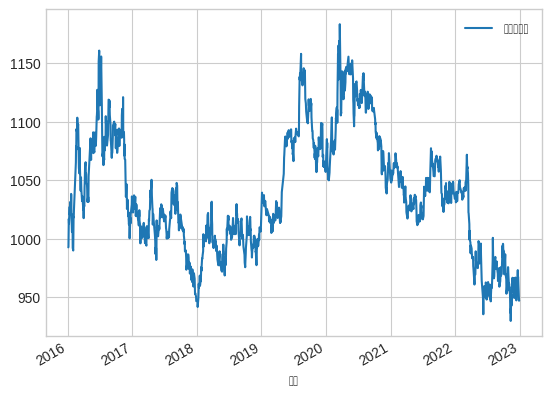

In [21]:
fig = data.plot()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/seasonal.py:359: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.tight_layout()
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/seasonal.py:359: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.tight_layout()
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/seasonal.py:359: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  fig.tight_layout()
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/seasonal.py:359: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI})

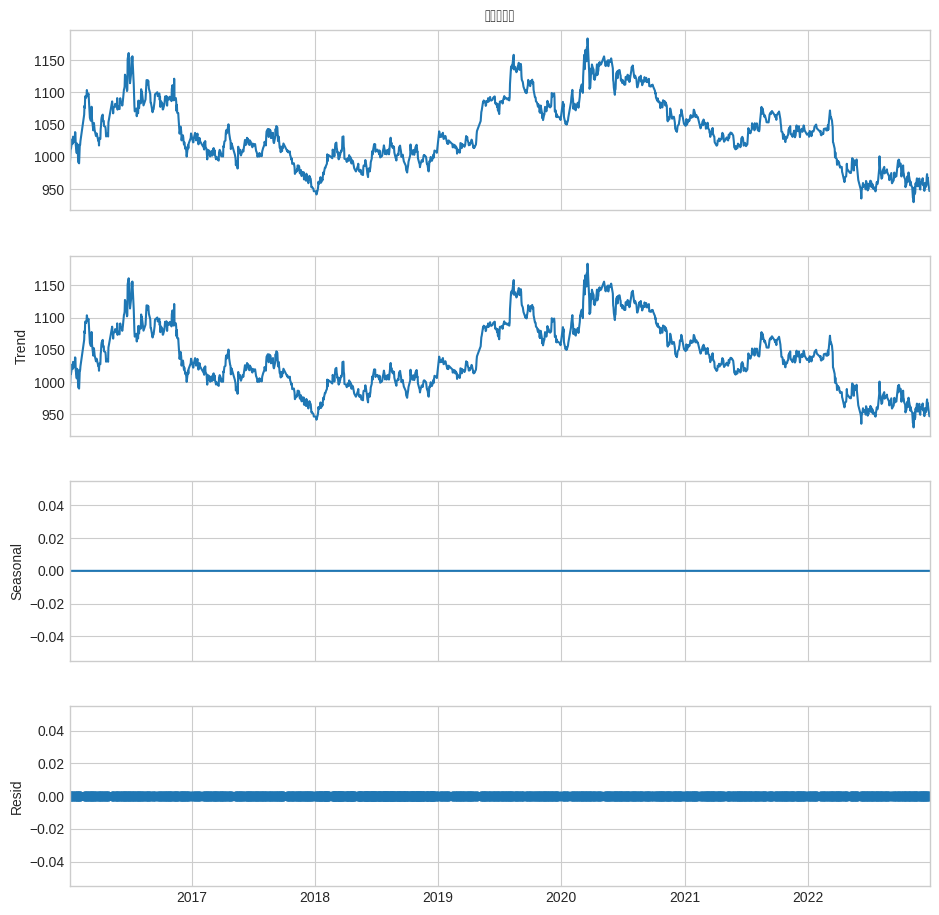

In [22]:
decomposition = sm.tsa.seasonal_decompose(data['매매기준율'], model='addictive', period=1)
fig = decomposition.plot()
fig.set_size_inches(10,10)
plt.show()

In [60]:
# Train:Test = 8:2
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)
test_data

,매매기준율
날짜,
2021-06-30,1020.31
2021-07-01,1017.10
2021-07-02,1016.54
2021-07-06,1019.47
2021-07-07,1027.70
...,...
2022-12-21,973.13
2022-12-22,966.76
2022-12-23,967.38


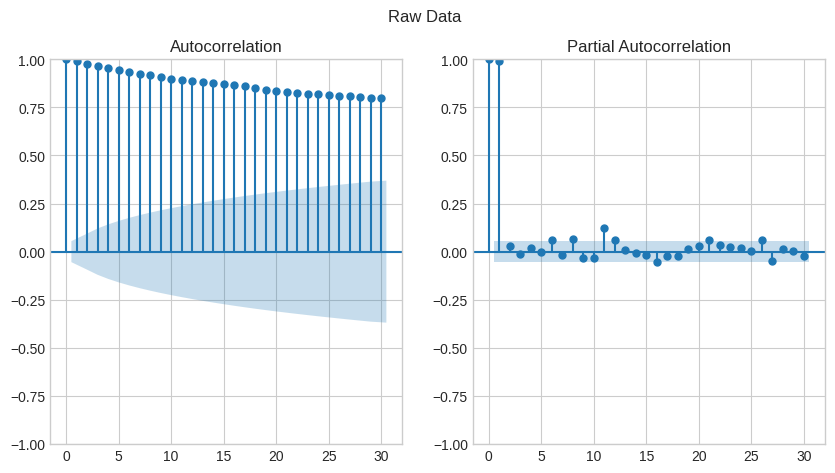

In [24]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(train_data.values.squeeze(),lags=30,ax=ax[0])
sm.graphics.tsa.plot_pacf(train_data.values.squeeze(),lags=30,ax=ax[1]);

In [25]:
# Differencing
diff_train_data =  train_data.copy()
diff_train_data =  diff_train_data['매매기준율'].diff()
diff_train_data = diff_train_data.dropna()
print('##### Raw Data #####')
print(train_data)
print('##### Differenced Data #####')
print(diff_train_data)

##### Raw Data #####
              매매기준율
날짜                 
2016-01-04   992.62
2016-01-05   993.00
2016-01-06  1005.06
2016-01-07  1016.95
2016-01-08  1013.12
...             ...
2021-06-23  1028.47
2021-06-24  1023.75
2021-06-25  1017.36
2021-06-28  1020.80
2021-06-29  1021.65

[1290 rows x 1 columns]
##### Differenced Data #####
날짜
2016-01-05     0.38
2016-01-06    12.06
2016-01-07    11.89
2016-01-08    -3.83
2016-01-12    14.20
              ...  
2021-06-23     2.50
2021-06-24    -4.72
2021-06-25    -6.39
2021-06-28     3.44
2021-06-29     0.85
Name: 매매기준율, Length: 1289, dtype: float64


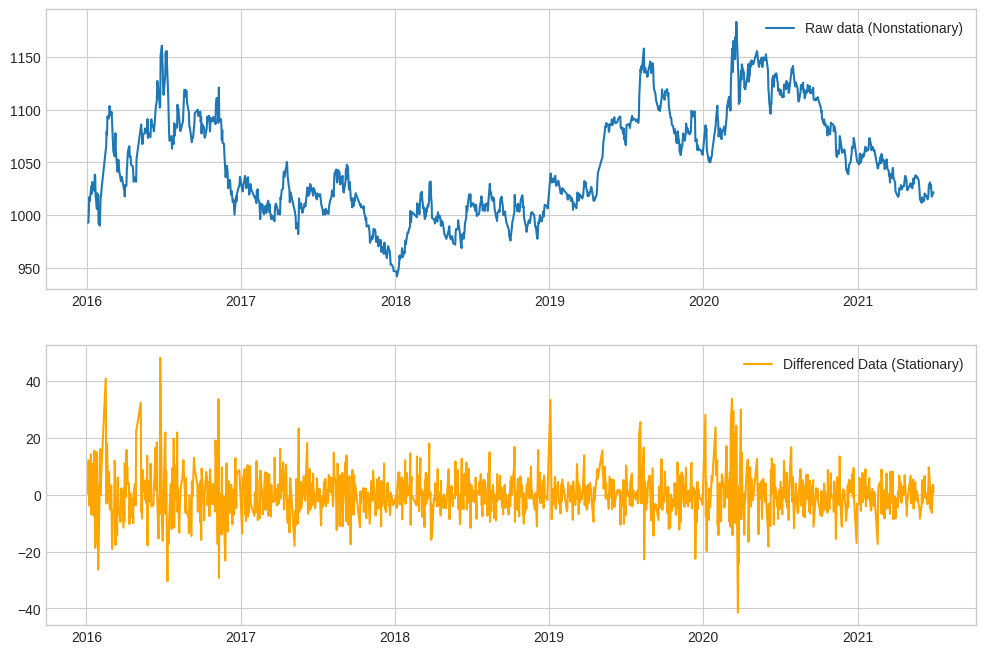

In [26]:
# Differenced data plot

plt.figure(figsize=(12,8))
plt.subplot(211)
plt.plot(train_data['매매기준율'])
plt.legend(['Raw data (Nonstationary)'])
plt.subplot(212)
plt.plot(diff_train_data,'orange')
plt.legend(['Differenced Data (Stationary)'])
plt.show()


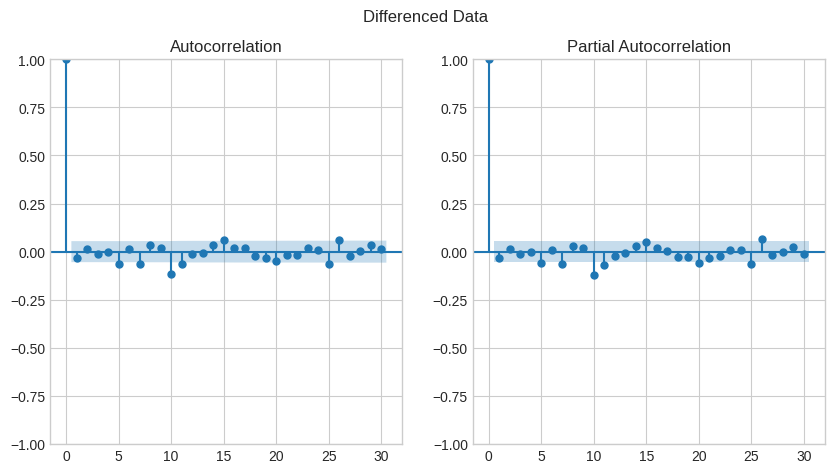

In [28]:
# ACF, PACF plot

fig, ax = plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Differenced Data')
sm.graphics.tsa.plot_acf(diff_train_data.values.squeeze(),lags=30,ax=ax[0])
sm.graphics.tsa.plot_pacf(diff_train_data.values.squeeze(),lags=30,ax=ax[1]);

In [31]:
model = ARIMA(train_data.values, order=(1,1,0))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1290
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -4417.280
Date:                Wed, 06 Sep 2023   AIC                           8838.559
Time:                        07:40:35   BIC                           8848.883
Sample:                             0   HQIC                          8842.434
                               - 1290                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0350      0.019     -1.829      0.067      -0.072       0.003
sigma2        55.4749      1.185     46.824      0.000      53.153      57.797
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1316.96
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                             0.61
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
auto_arima_model = auto_arima(train_data, start_p = 1, start_q = 1, max_p = 3, max_q = 3,
                              d=1, trace=True, error_action='ignore', supress_warnings=True, stepwise=False)

auto_arima_model.summary()

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=8840.129, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=8840.593, Time=0.84 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=8842.298, Time=1.20 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=8844.070, Time=1.41 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=8840.547, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=8840.220, Time=1.05 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=8842.205, Time=2.35 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=8843.921, Time=6.51 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=8842.264, Time=1.09 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=8842.205, Time=2.68 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=8838.143, Time=3.88 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=8839.610, Time=2.79 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=8844.020, Time=0.57 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=8838.826, Time=2.21 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=8839.593, Time=5.09 sec

Best mode

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1290
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -4413.072
Date:                Wed, 06 Sep 2023   AIC                           8838.143
Time:                        08:24:38   BIC                           8869.113
Sample:                             0   HQIC                          8849.768
                               - 1290                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0017      0.021      0.081      0.936      -0.040       0.043
ar.L1          0.0644      0.144      0.448      0.654      -0.218       0.347
ar.L2          0.7945      0.124      6.431      0.000       0.552       1.037
ma.L1         -0.1157      0.149     -0.779      0.436      -0.407       0.176
ma.L2         -0.7942      0.134     -5.914      0.000      -1.057      -0.531
sigma2        55.1103      1.224     45.030      0.000      52.712      57.509
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):              1405.48
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                             0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
prediction = auto_arima_model.predict(len(test_data), return_conf_int=True)
predicted_value = prediction[0]
predicted_ub = prediction[1][:,0]
predicted_lb = prediction[1][:,1]
predict_index = list(test_data.index)

r2 = r2_score(test_data, predicted_value)
r2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


-0.28732307336954976

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

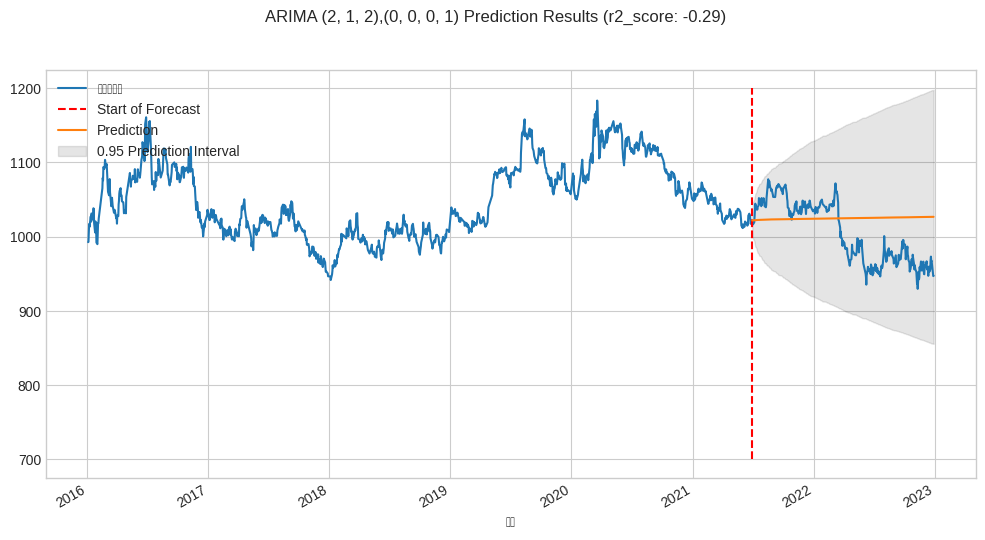

In [66]:
fig, ax = plt.subplots(figsize=(12,6))
data.plot(ax=ax);
ax.vlines('2021-06-30', 700, 1200, linestyle='--', color='r', label='Start of Forecast');
ax.plot(predict_index, predicted_value, label='Prediction')
ax.fill_between(predict_index, predicted_lb, predicted_ub, color='k', alpha=0.1, label='0.95 Prediction Interval')
ax.legend(loc='upper left')
plt.suptitle(f'ARIMA {auto_arima_model.order},{auto_arima_model.seasonal_order} Prediction Results (r2_score: {round(r2, 2)})')
plt.show()